# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [14]:
df = pd.read_csv('student_grades.csv')
df

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97
...,...,...,...,...,...
99,100,70.0,65,78.0,77
100,101,62.0,70,79.0,70
101,102,58.0,65,70.0,68
102,103,57.0,65,75.0,65


In [ ]:
# Use our wrangle function to acquire and prepare our data.
# regex preview:
# r'' : raw string for regex, file our f'' stings
# ^ == begins with
# \s == any whitespace character
# * == zero or more times
# $ ends with

# df.exam3.replace(r'^\s*#', np.nan, regex=True)

In [15]:
#look at your data!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    float64
 4   final_grade  102 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.8 KB


In [19]:
# check that exam1 as an int is the same as exam1
(df.exam1.astype(int) == df.exam1).mean()

1.0

In [20]:
(df.exam3.astype(int) == df.exam3).mean()

1.0

In [21]:
df = df.astype(int)

In [23]:
# verify student_id is unique
(df.student_id == df.index + 1).mean()

1.0

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
train_val, test = train_test_split(df,
                                  train_size=.8,
                                  random_state=1349)
train, val = train_test_split(train_val,
                                  train_size=.7,
                                  random_state=1349)


In [28]:
train.shape, val.shape, test.shape

((56, 5), (25, 5), (21, 5))

In [29]:
columns = train.drop(columns=['final_grade','student_id']).columns.to_list()

In [30]:
train_scaled = train.copy()

#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

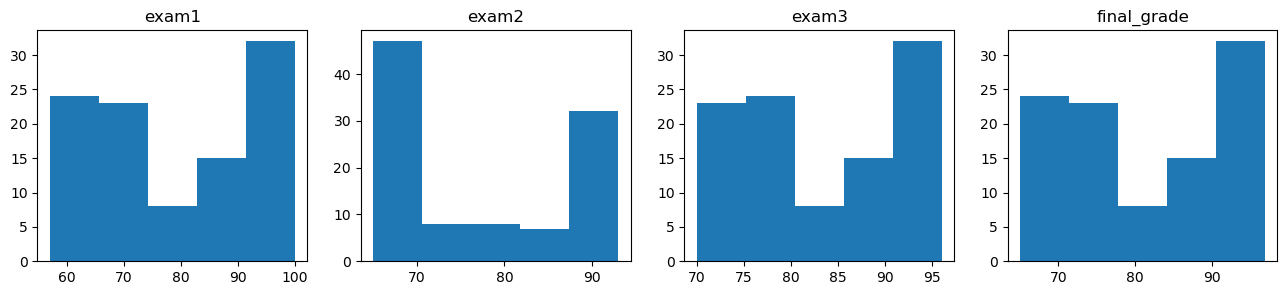

In [36]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [ ]:
#train, validate, test split


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
train_scaled = MinMaxScaler().fit_transform(train.drop(
    columns=['final_grade', 'student_id']))

In [34]:
X_train, y_train = train[columns], train['final_grade']

In [35]:
X_train.head()

,exam1,exam2,exam3
0,100,90,95
61,62,70,79
24,57,65,75
102,57,65,75
50,57,65,75


## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no there linear correlation between exam1 and final_grade
- ${H_a}$:  there is a ordinal correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [37]:
# create the correlation matrix using pandas .corr()
exam_corr = train.drop(columns='student_id').corr(method='spearman')

<AxesSubplot:>

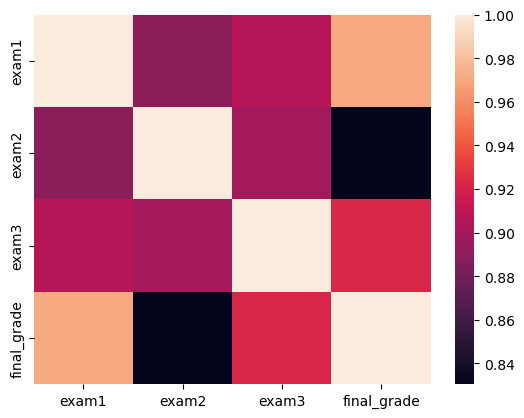

In [40]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

In [41]:
np.triu(exam_corr)

array([[1.        , 0.88985825, 0.90658142, 0.9709376 ],
       [0.        , 1.        , 0.89993997, 0.83051039],
       [0.        , 0.        , 1.        , 0.92201006],
       [0.        , 0.        , 0.        , 1.        ]])

<AxesSubplot:>

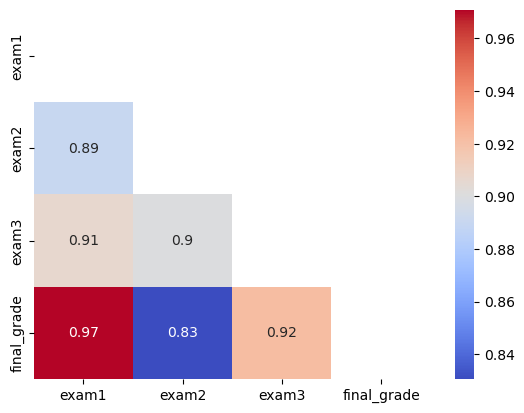

In [48]:
sns.heatmap(exam_corr,
           cmap='coolwarm',
           mask=np.triu(exam_corr),
           annot=True)

In [ ]:
# pass my correlation matrix to Seaborn's heatmap with customization


<AxesSubplot:>

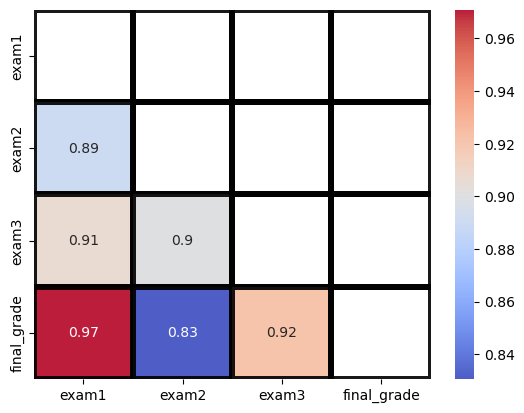

In [51]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}
sns.heatmap(exam_corr,
           cmap='coolwarm',
           annot=True,
            mask=np.triu(exam_corr),
            **kwargs
           )
## the **kwargs is an UNPACKING of a dictionary
# which matches the string in the dictionary to the keyword of the arguments
# we can package all the keywords of the funciton via a dictionary, so that
# we cna reuse the keywords without having to retype them every time

### Test Hypothesis

In [52]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train['exam1'], train['final_grade'])

In [53]:
if p < 0.5:
    print('we can reject our null hypothesis')
else:
    print('we failed to reject our null hypothesis')

we can reject our null hypothesis


#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

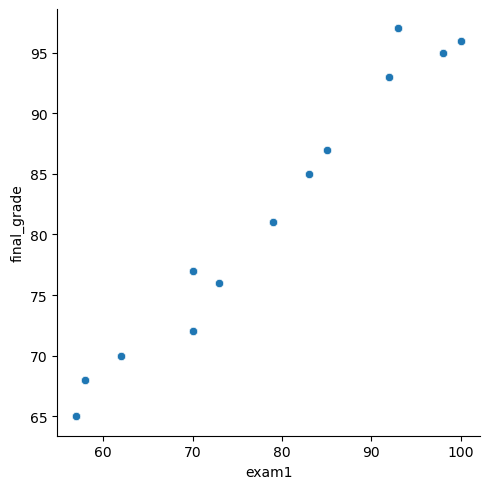

In [55]:
# if working with a large dataset, remember to take a df.sample(number) of the dataset
sns.relplot(data=train,
           x='exam1',
           y='final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

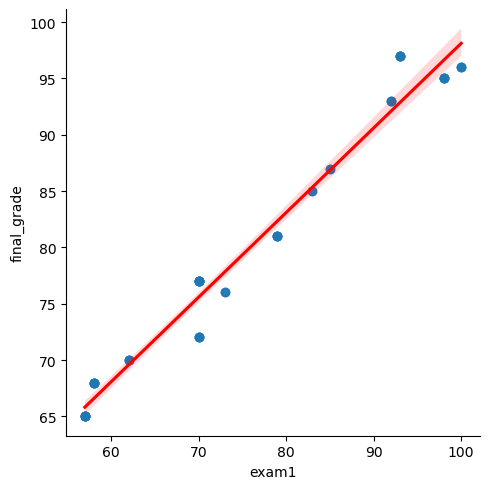

In [58]:
# I can really pop that line color if I want
sns.lmplot(data=train,
          x='exam1',
          y='final_grade',
          #line_kws can set the line color
           line_kws={'color':'red'}
          )
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

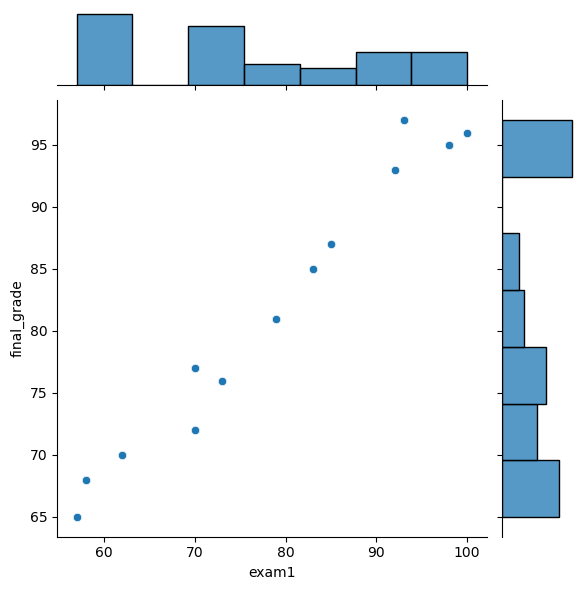

In [61]:
sns.jointplot(data=train,
             x='exam1',
             y='final_grade')
plt.show()

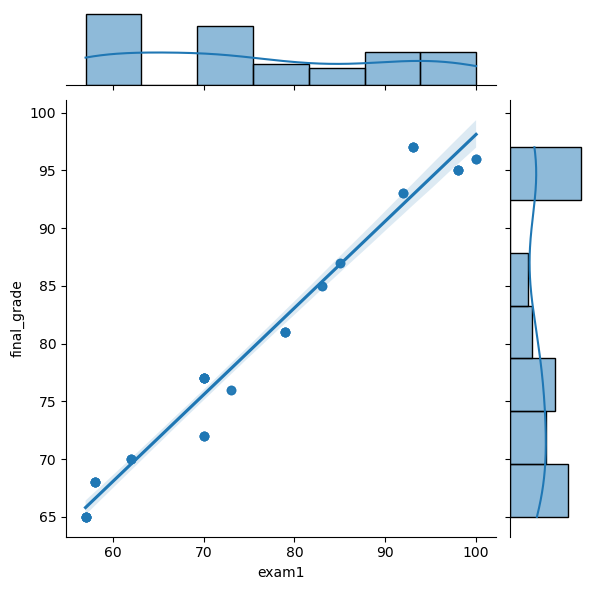

In [62]:
# we can a regression line with kind='reg'
sns.jointplot(data=train,
             x='exam1',
             y='final_grade',
             kind='reg')
plt.show()

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

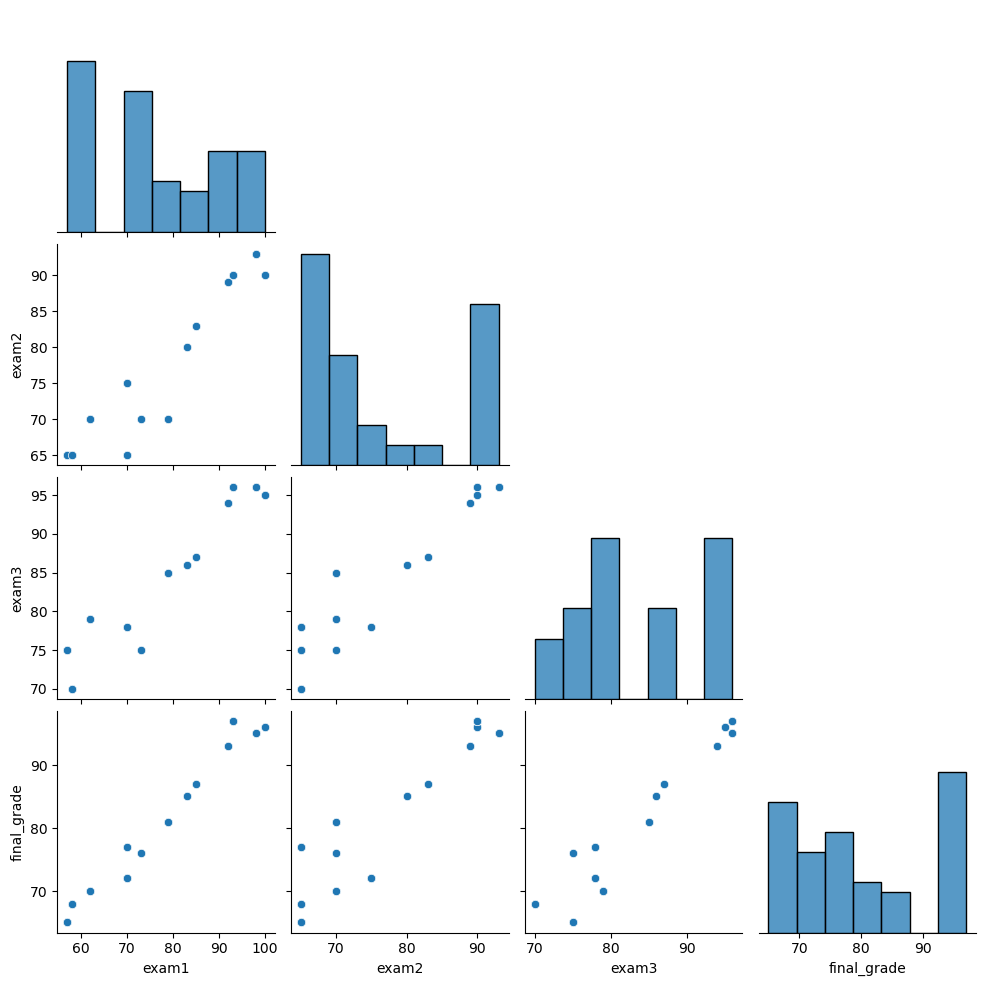

In [64]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(train.drop(columns='student_id'), corner=True)

Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [68]:
#number of people who failed each test
# what do we define failing to be?
# lets use a 70 point cutoff

for col in train.drop(columns='student_id').columns:
    num = (train[col] < 70).sum()
    total = len(train)
    print(f'{num} out of {total} students failed {col}')

17 out of 56 students failed exam1
21 out of 56 students failed exam2
0 out of 56 students failed exam3
13 out of 56 students failed final_grade


### Make categorical values for further exploration

In [69]:
#assign fail and pass for each test
for col in train.drop(columns='student_id').columns:
    train[f'passed_{col}'] = np.where(train[col] >= 70, 1, 0)
    # using f string for the name assignment
    # np.wehre is same an if/then

In [70]:
train[['exam1', 'passed_exam1']]

,exam1,passed_exam1
0,100,1
61,62,0
24,57,0
102,57,0
50,57,0
87,62,0
15,85,1
89,57,0
95,93,1
23,58,0


### Whats the relationship between passing exam1 and the final_exam grade?

<function matplotlib.pyplot.show(close=None, block=None)>

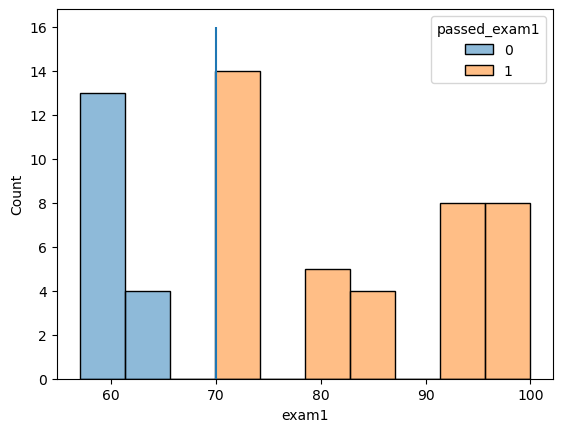

In [72]:
#seaborn histplot 
sns.histplot(data=train,
            x='exam1',
            hue='passed_exam1',
            bins=10)
plt.vlines(70,0,16)
plt.show

In [73]:
#mean final_grade by exam1 pass/fail status
train.groupby('passed_exam1').final_grade.max()

passed_exam1
0    70
1    97
Name: final_grade, dtype: int64

### What percentage of students failed exam1 and the final?

In [77]:
((train['passed_exam1'] == 0) & (train.final_grade < 70)).mean() * 100

23.214285714285715

In [79]:
train[train['exam1'] < 70]

,student_id,exam1,exam2,exam3,final_grade,passed_exam1,passed_exam2,passed_exam3,passed_final_grade
61,62,62,70,79,70,0,1,1,1
24,25,57,65,75,65,0,0,1,0
102,103,57,65,75,65,0,0,1,0
50,51,57,65,75,65,0,0,1,0
87,88,62,70,79,70,0,1,1,1
89,90,57,65,75,65,0,0,1,0
23,24,58,65,70,68,0,0,1,0
101,102,58,65,70,68,0,0,1,0
9,10,62,70,79,70,0,1,1,1
88,89,58,65,70,68,0,0,1,0


In [80]:
train[(train['passed_exam1'] == 0) & (train.final_grade < 70)]

,student_id,exam1,exam2,exam3,final_grade,passed_exam1,passed_exam2,passed_exam3,passed_final_grade
24,25,57,65,75,65,0,0,1,0
102,103,57,65,75,65,0,0,1,0
50,51,57,65,75,65,0,0,1,0
89,90,57,65,75,65,0,0,1,0
23,24,58,65,70,68,0,0,1,0
101,102,58,65,70,68,0,0,1,0
88,89,58,65,70,68,0,0,1,0
75,76,58,65,70,68,0,0,1,0
76,77,57,65,75,65,0,0,1,0
11,12,57,65,75,65,0,0,1,0


### Of the students who failed exam1, how many also failed the final?

 Given that a student failed exam1, what is the percentage that failed the final

In [81]:
#create subset of people who failed exam1
(train[train['exam1'] < 70].final_grade < 70).mean() *100

76.47058823529412

In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [83]:
#create subset of people who failed exam2
subset = train[train['exam2'] < 70]

In [99]:
len(subset)

13

In [93]:
#how many failed final
(subset['final_grade'] < 70).sum()

13

In [98]:
#percentage who failed final
(subset.final_grade < 70).mean() *100

100.0

### Of the students who failed both exam1 and exam2, how many also failed the final?

In [92]:
#create subset of people who failed exam2
subset = train[(train['exam1'] < 70) & (train['exam2'] < 70)]

In [96]:
len(subset)

13

In [94]:
#how many failed final
(subset['final_grade'] < 70).sum()

13

In [97]:
#percentage who failed final
(subset.final_grade < 70).mean() *100

100.0

#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 